In [16]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

fname   = 'Crimes_-_2001_to_present.csv'

datadir = './Data/'

# Load Data 

In [17]:
df = pandas.read_csv(datadir + fname, sep = ',')
df.loc[:,'Date'] = pandas.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df['DateMonth'] = df['Date'].values.astype('datetime64[M]')
df['Hour'] = df['Date'].dt.hour
print(df.shape)
print(df.columns)

(10000, 23)
Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'DateMonth', 'Hour'],
      dtype='object')


# Data Summary 

In [18]:
crime_types = df['Primary Type'].unique()
print('==' * 10, 'CRIME TYPES')
print(crime_types)


districts = df['District'].unique()
print('==' * 10, 'DISTRICTS')
print(districts)


==================== CRIME TYPES
['THEFT' 'ARSON' 'BATTERY' 'ASSAULT' 'DECEPTIVE PRACTICE'
 'CRIMINAL DAMAGE' 'OTHER OFFENSE' 'ROBBERY' 'WEAPONS VIOLATION'
 'NARCOTICS' 'MOTOR VEHICLE THEFT' 'PUBLIC PEACE VIOLATION' 'BURGLARY'
 'CRIMINAL TRESPASS' 'KIDNAPPING' 'PROSTITUTION'
 'OFFENSE INVOLVING CHILDREN' 'CRIM SEXUAL ASSAULT'
 'INTERFERENCE WITH PUBLIC OFFICER' 'GAMBLING' 'SEX OFFENSE' 'STALKING'
 'HOMICIDE' 'INTIMIDATION' 'LIQUOR LAW VIOLATION' 'OBSCENITY']
==================== DISTRICTS
[ 1  8  6 25 12 15  4  2  5  3 18 11  9 19 22  7 17 10 14 24 16 20]


## Crime Type Distribution 

Most common crimes (>= 10% of the total)
Index(['ROBBERY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'ASSAULT',
       'BURGLARY', 'OTHER OFFENSE', 'NARCOTICS', 'CRIMINAL DAMAGE', 'BATTERY',
       'THEFT'],
      dtype='object', name='Primary Type')


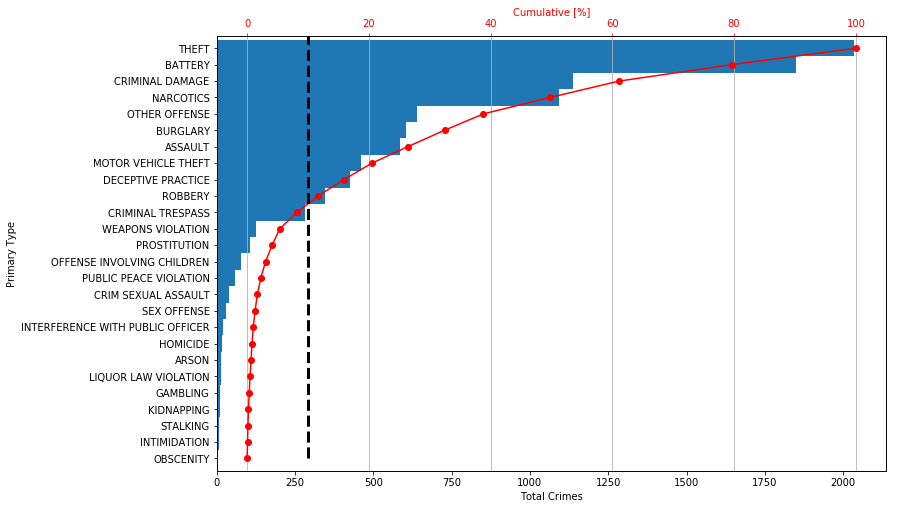

In [19]:
min_thr = 10

plt.figure(figsize=(12,8))
ax = plt.gca()
X = df.groupby('Primary Type')['ID'].count().sort_values(ascending=True)
X.plot(kind='barh', width=1)
crime_order = X.index.values
plt.xlabel('Total Crimes')

ax2= plt.gca().twiny()
X = (X.cumsum() / X.sum() * 100)
ax2.plot(X, ax.get_yticks(), 'ro-')
ax2.set_xlabel('Cumulative [%]', color='r')
ax2.tick_params('x', colors='r')
ax2.plot([min_thr, min_thr], [0, X.shape[0]],'--k', lw=3)

ax2.grid()

crimes = X.index[X >= min_thr]
print('Most common crimes (>= %i%% of the total)'%min_thr)
print(crimes)

## Crime District Distribution 

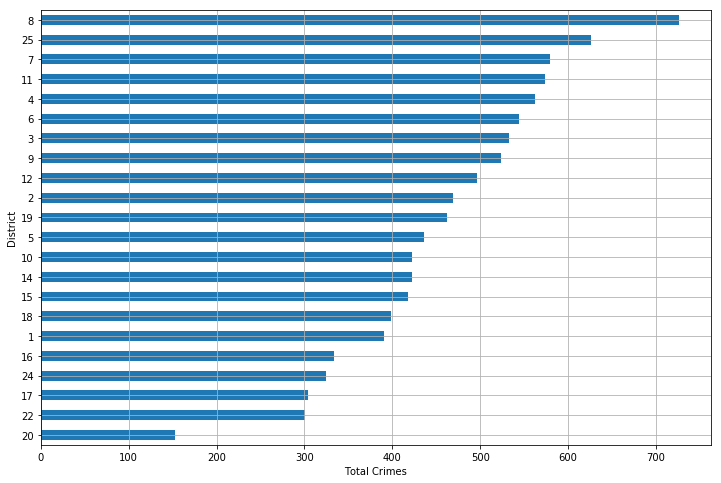

In [21]:
plt.figure(figsize=(12,8))
df.groupby('District')['ID'].count().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Total Crimes')
plt.grid()

## Distribution For Crime Type / District

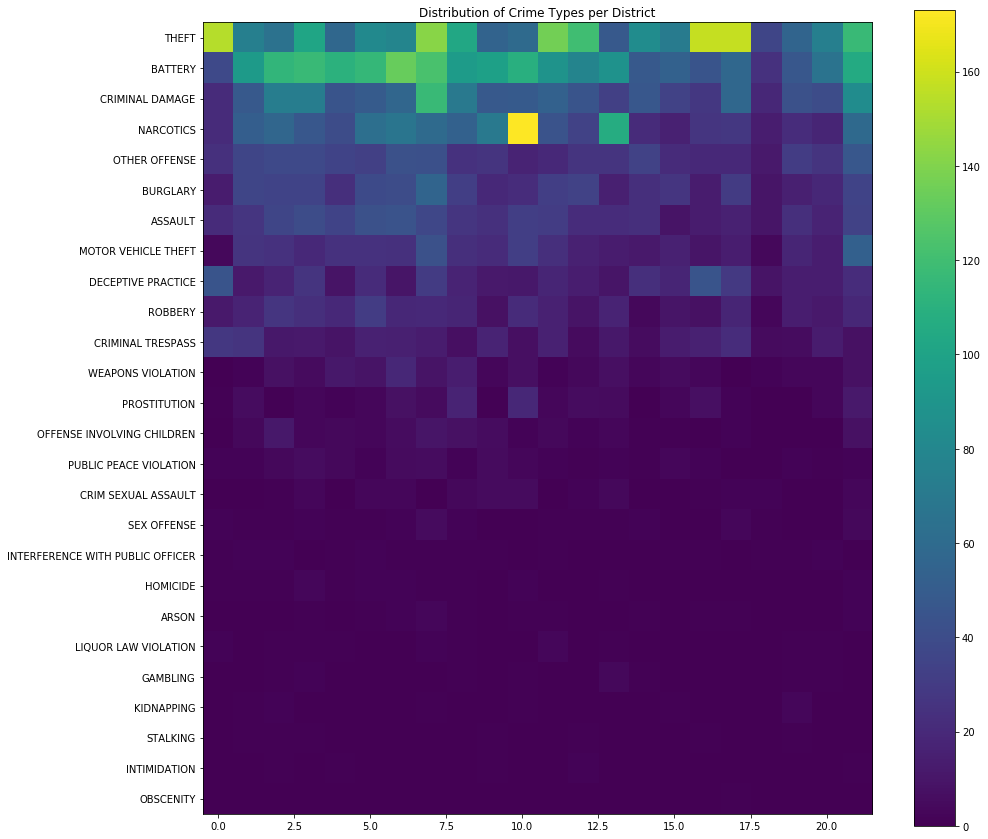

In [22]:
plt.figure(figsize=(15,15))
X = df.groupby(['Primary Type','District'], as_index=False)['ID'].count()
X = X.pivot('Primary Type','District','ID')
X.fillna(0, inplace=True)
idx = X.T.sum().sort_values(ascending=False).index
X = X.loc[idx]
plt.imshow(X.values)
plt.yticks(np.arange(X.shape[0]), X.index)
plt.title('Distribution of Crime Types per District')
plt.colorbar()

### Distribution Of Crime Types Over Districts (sums 1 over district)

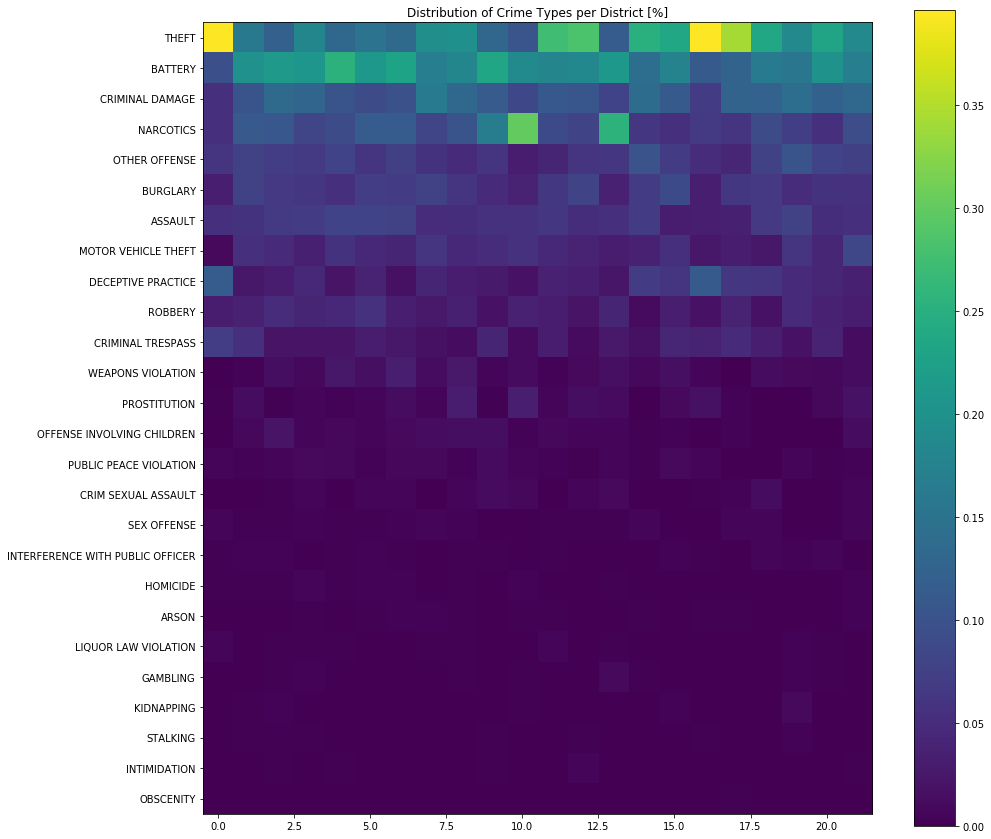

In [23]:
plt.figure(figsize=(15,15))
X = X/X.sum() # Crime rate per type for each district
plt.imshow(X.values)
plt.yticks(np.arange(X.shape[0]), X.index)
plt.title('Distribution of Crime Types per District [%]')
plt.colorbar()

### Distribution Over Crime Type for the Districts (sums 1 over crime type)

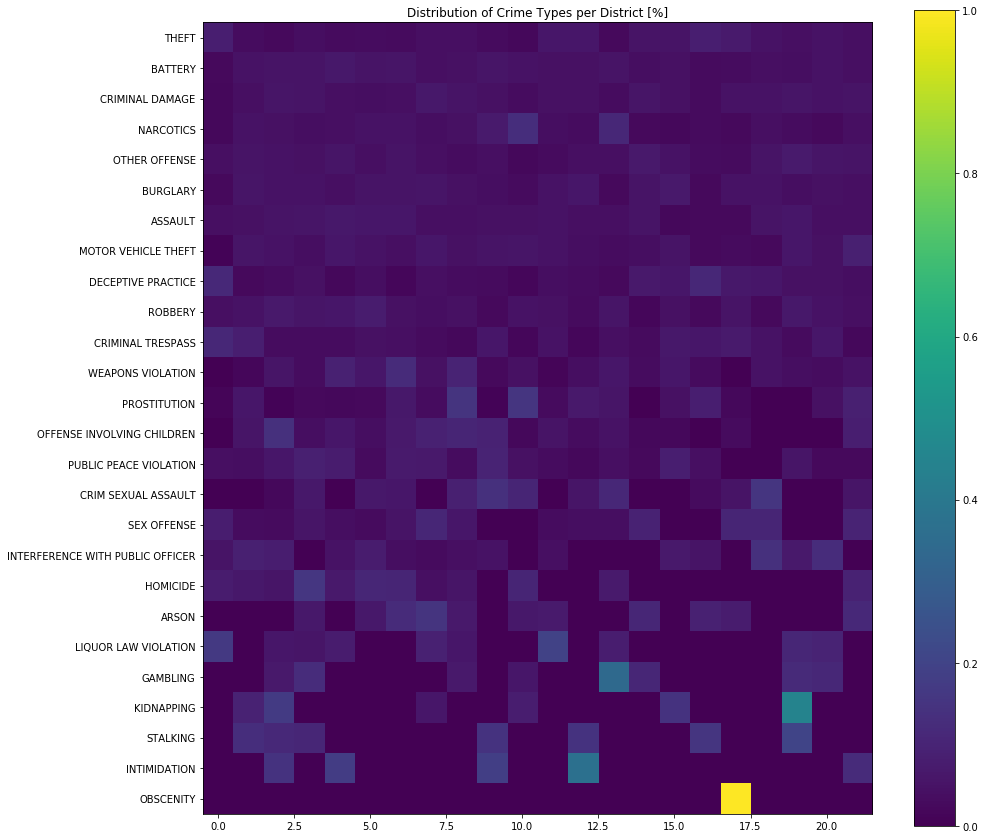

In [24]:
plt.figure(figsize=(15,15))
X = (X.T/X.T.sum()).T # Crime rate per type for each district
plt.imshow(X.values)
plt.yticks(np.arange(X.shape[0]), X.index)
plt.title('Distribution of Crime Types per District [%]')
plt.colorbar()

# Time Series 

## Top Crimes Over Time 

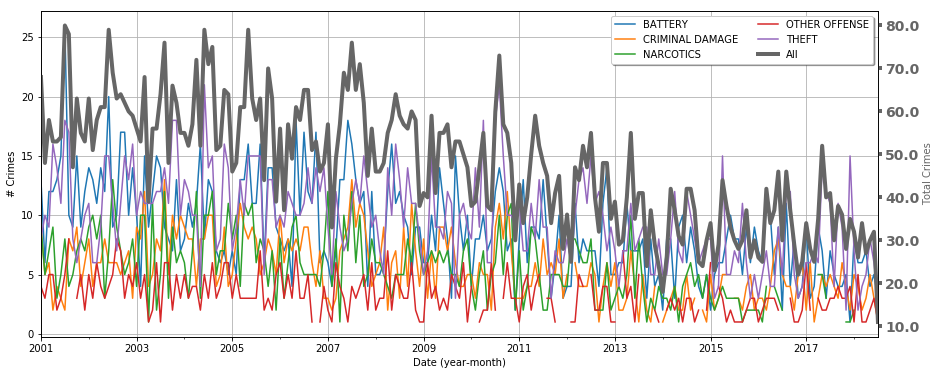

In [25]:
nshow = 5
plt.figure(figsize=(15,6))
ax = plt.gca()
# Per Type
X = df.groupby('Primary Type').ID.count().sort_values(ascending=False)
idx = df['Primary Type'].isin(X.index.values[:nshow])
df[idx].groupby(['DateMonth','Primary Type']).ID.count().unstack().plot(ax=ax, legend=False)
patches, labels = plt.gca().get_legend_handles_labels()    
ax2 = ax.twinx()
df.groupby('DateMonth').ID.count().plot(lw=4, c='#666666', ax=ax2, legend=False)
ax2.set_ylabel('Total Crimes', color='#666666', )
ax2.tick_params('y', colors='#666666', width=4, labelsize=14)
ax2.set_yticklabels(ax2.get_yticks(), {'weight':'bold'})

patches.extend(ax2.get_legend_handles_labels()[0])
labels.append('All')

leg = ax.legend(patches, labels, shadow=True, framealpha=None, facecolor='w', ncol=2)

ax.set_ylabel('# Crimes')
ax.set_xlabel('Date (year-month)')
ax.grid()

## Hourly Crimes 

In [26]:
from matplotlib import colors
cmap = list(colors.get_named_colors_mapping().values())

Text(0.5,1,'Crime Probability over the Day per Type')

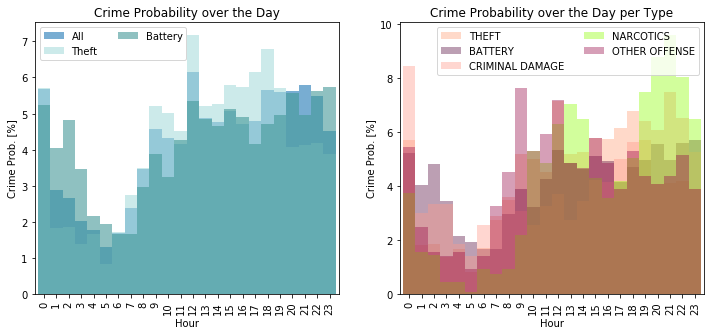

In [27]:
nshow = 5
plt.figure(figsize=(12,5))

# TOP AND ALL
plt.subplot(1,2,1)
X = df.groupby('Hour').ID.count() / float(df.shape[0]) * 100.
X.plot('bar', width=1, alpha=0.6, label='All')

X = df[df['Primary Type'] == 'THEFT'].groupby('Hour').ID.count()
X = X / float(X.sum()) * 100.
X.plot('bar', width=1,color='#aadddd', alpha = 0.6,label='Theft')

X = df[df['Primary Type'] == 'BATTERY'].groupby('Hour').ID.count()
X = X / float(X.sum()) * 100.
X.plot('bar', width=1,color='#449999',alpha=0.6, label='Battery')

plt.ylabel('Crime Prob. [%]')
plt.title('Crime Probability over the Day')
plt.legend(loc='best', ncol=2)

# PER TYPE
ax = plt.subplot(1,2,2)
# Per Type
X = df.groupby(['Primary Type']).ID.count().sort_values(ascending=False)
for i, c_type in enumerate(X.index.values[:nshow]):
    X = df[df['Primary Type'] == c_type].groupby(['Hour','Primary Type']).ID.count().unstack()
    X = X / X.sum() * 100
    X.plot(kind='bar',ax=ax,color=cmap[i],alpha=0.4, width=1, legend=False, label=c_type)
plt.legend(loc='best', ncol=2)
plt.ylabel('Crime Prob. [%]')
plt.title('Crime Probability over the Day per Type')
